In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
bank_df=pd.read_csv("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Logistic Regression\\bank_full.csv")
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# EDA

In [3]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
bank_df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
# There are no null values in the data set

In [6]:
bank_df=bank_df.drop(['day','month'],axis=1)

In [7]:
# Creating numerical values for Categorical values for easy plotting and analysis
bank_df=pd.get_dummies(bank_df, columns=['y'])

In [8]:
bank_df=bank_df.rename({'y_yes':'yes'},axis=1)

In [9]:
bank_df=bank_df.drop(['y_no'],axis=1)

In [10]:
bank_df

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,-1,0,unknown,0


In [11]:
np.unique(bank_df.age)

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 92, 93, 94, 95], dtype=int64)

#Age Analysis

<AxesSubplot:title={'center':'Age Plot'}, xlabel='age'>

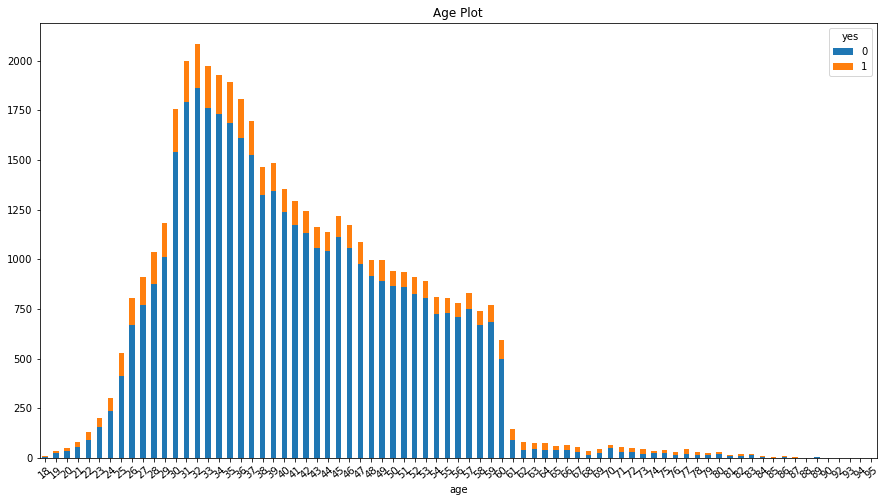

In [12]:
df_plt=bank_df.groupby(['age','yes']).size().reset_index().pivot(columns='yes', index='age',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,figsize=(15,8),title='Age Plot')


In [13]:
# People opting for a term deposit is more in the middle age than in the older age

#Job Analysis

<AxesSubplot:title={'center':'job Plot'}, xlabel='job'>

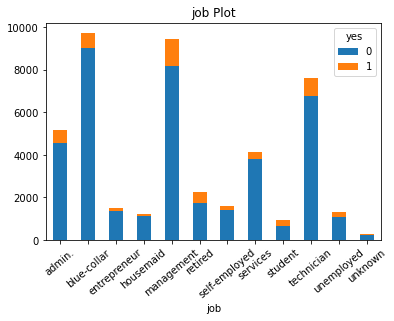

In [14]:
df_plt=bank_df.groupby(['job','yes']).size().reset_index().pivot(columns='yes', index='job',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='job Plot')

In [15]:
# Many of the term deposits where from housemaids and the least are from unknown group 

#Marital Status Analalysis

<AxesSubplot:title={'center':'Marital status Plot'}, xlabel='marital'>

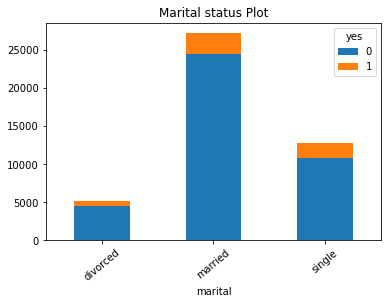

In [16]:
df_plt=bank_df.groupby(['marital','yes']).size().reset_index().pivot(columns='yes', index='marital',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='Marital status Plot')

In [17]:
# Many of the deposits were from married people

#Education analysis

<AxesSubplot:title={'center':'Education Plot'}, xlabel='education'>

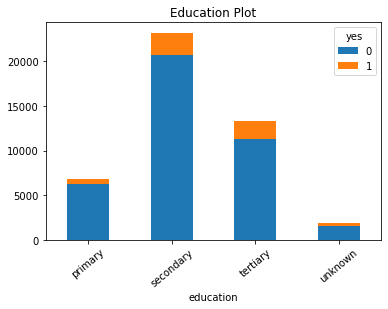

In [18]:
df_plt=bank_df.groupby(['education','yes']).size().reset_index().pivot(columns='yes', index='education',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='Education Plot')

In [19]:
# Secondary and tertiary have many deposits

#Default Analysis

<AxesSubplot:title={'center':'Defaulters Plot'}, xlabel='default'>

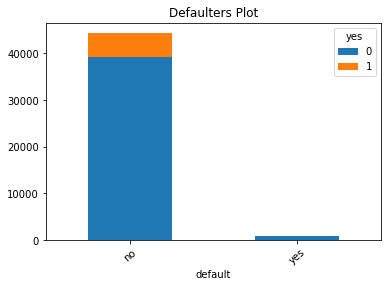

In [20]:
df_plt=bank_df.groupby(['default','yes']).size().reset_index().pivot(columns='yes', index='default',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='Defaulters Plot')

In [21]:
# No one who has a default background has taken the term deposit

#Housing Analysis

<AxesSubplot:title={'center':'Housing loans Plot'}, xlabel='housing'>

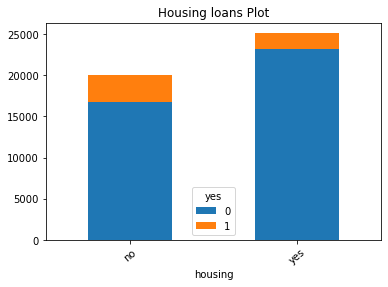

In [22]:
df_plt=bank_df.groupby(['housing','yes']).size().reset_index().pivot(columns='yes', index='housing',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='Housing loans Plot')

In [23]:
# Both groups have taken the term deposit  

#Loan Analysis

<AxesSubplot:title={'center':'Personal loans Plot'}, xlabel='loan'>

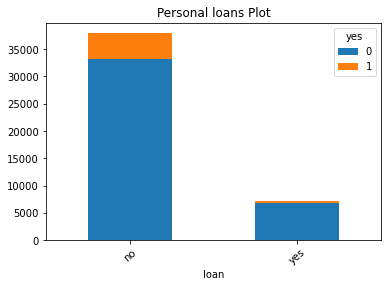

In [24]:
df_plt=bank_df.groupby(['loan','yes']).size().reset_index().pivot(columns='yes', index='loan',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='Personal loans Plot')

In [25]:
# Ones who have taken personal loans have shown less interest in subscribing to the term deposit

#Contact Analysis

<AxesSubplot:title={'center':'Contac type Plot'}, xlabel='contact'>

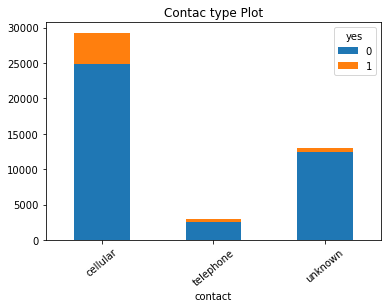

In [26]:
df_plt=bank_df.groupby(['contact','yes']).size().reset_index().pivot(columns='yes', index='contact',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='Contac type Plot')

In [27]:
# Ones who had cellular contact tends to subscribe more to the deposit

#Campaign Analysis

<AxesSubplot:title={'center':'No of contacts during the campaign'}, xlabel='campaign'>

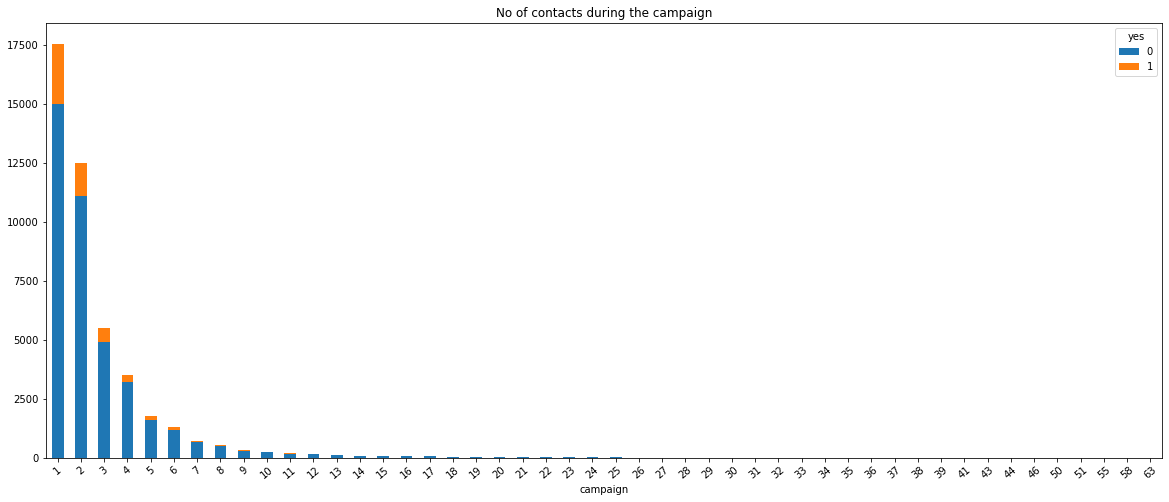

In [28]:
df_plt=bank_df.groupby(['campaign','yes']).size().reset_index().pivot(columns='yes', index='campaign',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,figsize=(20,8),title='No of contacts during the campaign')

In [29]:
# People  whom we have contacted less have subscribed to the term deposit 

#Previous Contacts

<AxesSubplot:title={'center':'Contacts before campaign'}, xlabel='previous'>

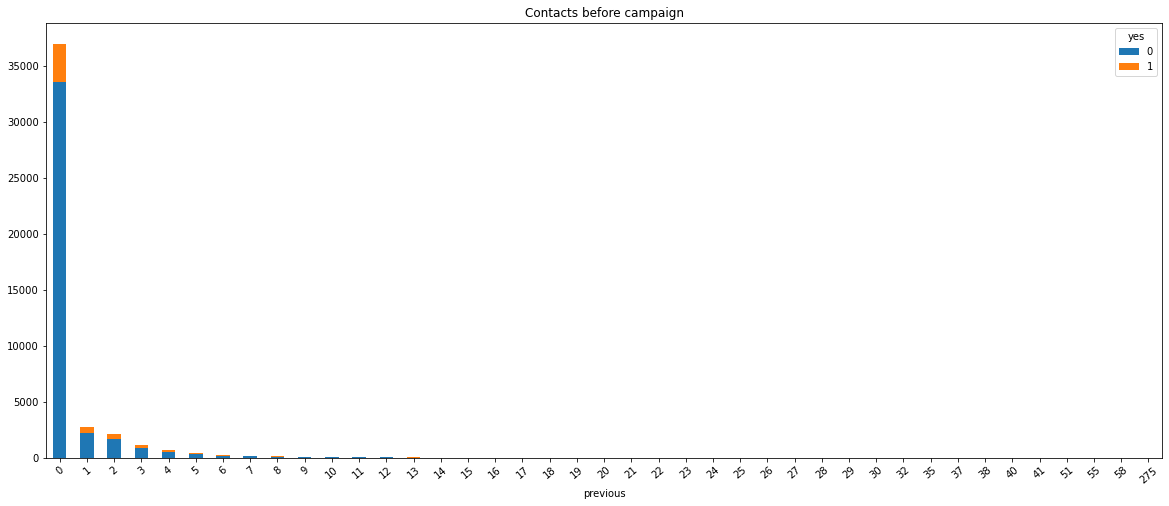

In [30]:
df_plt=bank_df.groupby(['previous','yes']).size().reset_index().pivot(columns='yes', index='previous',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,figsize=(20,8),title='Contacts before campaign')

In [31]:
# mostly people whom we have not contacted in the previous campaign have turned up to subscribe in this campaign 

#Poutcome Analysis

<AxesSubplot:title={'center':'Outcome of previous marketing'}, xlabel='poutcome'>

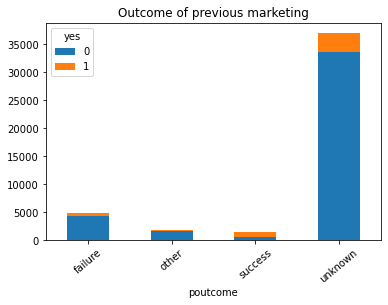

In [32]:
df_plt=bank_df.groupby(['poutcome','yes']).size().reset_index().pivot(columns='yes', index='poutcome',values=0)
df_plt.plot(kind='bar', stacked=True,rot=40,title='Outcome of previous marketing')

In [33]:
# Most of the outcomes of the previous campaigns is not known and few of the previous campaigns were successful

# Model Building

In [34]:
# Converting categorical data to numerical for the Model training

In [35]:
cate_list=['job','marital','education','default','housing','loan','contact','poutcome']

In [36]:

for i in cate_list:
    bank_df[i]=bank_df[i].astype('category')
    bank_df[i] = bank_df[i].cat.codes

bank_df.head()
        

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,yes
0,58,4,1,2,0,2143,1,0,2,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,198,1,-1,0,3,0


In [37]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [38]:
bank_df.balance = norm_func(bank_df.balance)
bank_df.duration=norm_func(bank_df.duration)
#bank_df=norm_func(bank_df)
#bank_df

In [39]:
# Train test for modeling

In [40]:
X = bank_df.iloc[:,:-1]
Y = bank_df.iloc[:,-1]

In [41]:
from sklearn.model_selection import train_test_split
train_x,test_x=train_test_split(X,test_size=0.2)
train_Y,test_Y=train_test_split(Y,test_size=0.2)

In [42]:
#Logistic regression and fitting the model
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X,Y)

LogisticRegression(max_iter=1000)

In [47]:
#Predicting the outputs
y_prob = log_reg.predict_proba(X)
y_pred= log_reg.predict(X)

pd.DataFrame(y_prob)

,0,1
0,0.965789,0.034211
1,0.978227,0.021773
2,0.994079,0.005921
3,0.979725,0.020275
4,0.913061,0.086939
...,...,...
45206,0.252567,0.747433
45207,0.754848,0.245152
45208,0.114641,0.885359
45209,0.823330,0.176670


In [48]:
y_pred_df= pd.DataFrame({'actual output': Y, 'predicted output': log_reg.predict(X)})
y_pred_df

,actual output,predicted output
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [49]:
np.round(log_reg.intercept_,3)

array([-3.824])

In [50]:
np.round(log_reg.coef_,3)

array([[ 8.0000e-03,  7.0000e-03,  2.2100e-01,  1.9200e-01, -4.1200e-01,
         7.3600e-01, -9.7600e-01, -6.8400e-01, -5.8300e-01,  1.7822e+01,
        -1.4000e-01,  4.0000e-03,  9.0000e-02,  2.1300e-01]])

In [51]:
log_reg.predict_proba(X)

array([[0.96578903, 0.03421097],
       [0.97822742, 0.02177258],
       [0.99407938, 0.00592062],
       ...,
       [0.11464149, 0.88535851],
       [0.82332957, 0.17667043],
       [0.53110129, 0.46889871]])

In [52]:
log_reg.score(X,Y)

0.8905797261728341

In [53]:
# accuracy of the model is 89%

In [54]:
# Confusion Matrix for the model accuracy

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39239   683]
 [ 4264  1025]]


In [55]:
# Manual calculation of accuracy

((39255+1014)/(39255+667+4275+1014))

0.8906903187277433

In [56]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y,y_pred)
accuracy

0.8905797261728341

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.19      0.29      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.59      0.62     45211
weighted avg       0.87      0.89      0.86     45211



# ROC Curve

In [58]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,threshold = roc_curve(Y,y_prob[:,1])
dp_roc=pd.DataFrame({"fpr" :fpr,"tpr":tpr,"cutoff":threshold})


In [59]:
dp_roc

,fpr,tpr,cutoff
0,0.000000,0.000000,2.000000
1,0.000025,0.000000,1.000000
2,0.000075,0.000000,0.999968
3,0.000075,0.000189,0.999966
4,0.000175,0.000189,0.999759
...,...,...,...
7028,0.967411,0.999622,0.006452
7029,0.967411,0.999811,0.006449
7030,0.995366,0.999811,0.001212
7031,0.995366,1.000000,0.001168


Text(0, 0.5, 'True Positive Rate')

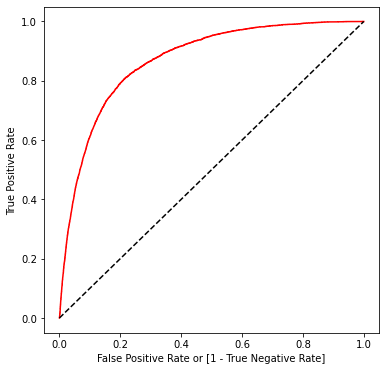

In [63]:
# Plotting ROC curve

f = plt.figure()
f.set_figwidth(6)
f.set_figheight(6)
plt.plot(fpr, tpr, color='red')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [61]:
# Area under the Curve
auc=roc_auc_score(Y,y_pred)
auc

0.5883450441539295